# Exploring the Alzheimer's prediction dataset from [kaggle](https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global)

### Loading the Dataset

In [3]:
import pandas as pd

alzheimers = pd.read_csv("alzheimers.csv")

### Summary Statistics

In [5]:
display(alzheimers.describe().style.set_caption("Numerical Columns"))
display(alzheimers.select_dtypes(include="object").describe().style.set_caption("Categorical Columns"))
display(alzheimers.info())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,DoctorInCharge
count,2149
unique,1
top,XXXConfid
freq,2149


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

None

This dataset appears to be very clean.
- No missing values, the row counts for each attribute remain consistent for all.
- Data types appear as expected.
- Frequency counts for categorical variables show a good distribution for each.

### Univariate Analysis

Linear correlation analysis:

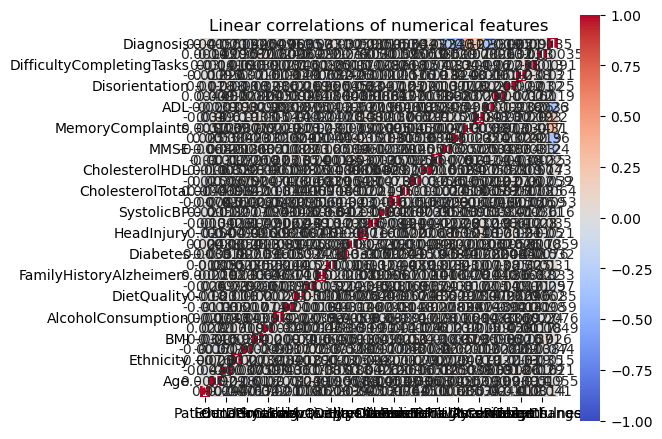

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(alzheimers.select_dtypes(include='number').corr().iloc[::-1], vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.title("Linear correlations of numerical features")
plt.tight_layout()
plt.show()

# Preprocessing

## Standardization + Ordinal Encoding + OneHot Encoding

Also changed whitespace to _, and removed apostraphes.

In [27]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_columns = alzheimers.select_dtypes(include = "number").columns

ordinal_columns = {
    'Physical Activity': {'Low': 0, 'Medium': 1, 'High': 2},
    'Alcohol Consumption': {'Never': 0, 'Occasionally': 1, 'Regularly': 2},
    'Cholesterol Level': {'Normal': 0, 'High': 1},
    'Depression Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Sleep Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Dietary Habits': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2},
    'Air Pollution Exposure': {'Low': 0, 'Medium': 1, 'High': 2},
    'Social Engagement Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Stress Levels': {'Low': 0, 'Medium': 1, 'High': 2},
}

non_binary_nominal_columns = [
    'Country',
    'Smoking Status',
    'Employment Status',
    'Marital Status',
]

binary_nominal_columns = [
    'Gender',
    'Diabetes',
    'Hypertension',
    'Family History of Alzheimer’s',
    'Genetic Risk Factor (APOE-ε4 allele)',
    'Urban vs Rural Living',
    'Alzheimer’s Diagnosis'
]

standard_scaler_transformer = StandardScaler()

def get_ordinal_categories(mapping):
    return [list(mapping[col].keys()) for col in mapping]

ordinal_column_names = list(ordinal_columns.keys())
ordinal_categories = get_ordinal_categories(ordinal_columns)

ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

onehot_nonbinary_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
onehot_binary_transformer = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

preprocessor = ColumnTransformer( # Using ColumnTransformer to just conglomerate the different transformers used, not nessecary
    transformers=[
        ("numerical", standard_scaler_transformer, numerical_columns),
        ("ordinal", ordinal_transformer, ordinal_column_names),
        ("onehot_nonbinary", onehot_nonbinary_transformer, non_binary_nominal_columns),
        ("onehot_binary", onehot_binary_transformer, binary_nominal_columns),
    ],
    remainder="passthrough"
)

alzheimers_encoded = preprocessor.fit_transform(alzheimers)

# --- After transformation, we lose our feature names, we can add them back in:

# non-binary nominal feature names
onehot_nonbinary_encoder = preprocessor.named_transformers_["onehot_nonbinary"]
nonbinary_feature_names = onehot_nonbinary_encoder.get_feature_names_out(non_binary_nominal_columns)

# binary nominal feature names
onehot_binary_encoder = preprocessor.named_transformers_["onehot_binary"]
binary_feature_names = onehot_binary_encoder.get_feature_names_out(binary_nominal_columns)

all_feature_names = (
    list(numerical_columns)
    + list(ordinal_column_names)
    + list(nonbinary_feature_names)
    + list(binary_feature_names)
)
alzheimers_encoded = pd.DataFrame(alzheimers_encoded, columns=all_feature_names)

# Replace whitespace with underscore and remove weird apostraphe
alzheimers_encoded.columns = (
    alzheimers_encoded.columns
    .str.replace(r"\s+", "_", regex=True)
    .str.replace("’", "", regex=False)
)
alzheimers_encoded

alzheimers_encoded.head()

ValueError: A given column is not a column of the dataframe

In [31]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assume alzheimers DataFrame is already defined with your provided columns

# Update the ordinal columns mapping to reflect the actual DataFrame column names
ordinal_columns = {
    'PhysicalActivity': {'Low': 0, 'Medium': 1, 'High': 2},
    'AlcoholConsumption': {'Never': 0, 'Occasionally': 1, 'Regularly': 2},
    'Depression': {'Low': 0, 'Medium': 1, 'High': 2},
    'SleepQuality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'DietQuality': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2},
}

# Extract ordinal column names and categories
ordinal_column_names = list(ordinal_columns.keys())
ordinal_categories = [list(ordinal_columns[col].keys()) for col in ordinal_column_names]

# Make sure ordinal columns are strings (object type)
alzheimers[ordinal_column_names] = alzheimers[ordinal_column_names].astype(str)

# Identify numerical columns from the DataFrame
numerical_columns = alzheimers.select_dtypes(include="number").columns.tolist()

# Update non-binary nominal columns (using available columns)
non_binary_nominal_columns = ['Ethnicity', 'EducationLevel']

# Update binary nominal columns (using available columns)
binary_nominal_columns = ['Gender', 'Diabetes', 'Hypertension', 'FamilyHistoryAlzheimers', 'Diagnosis']

# Initialize transformers
standard_scaler_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)
onehot_nonbinary_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
onehot_binary_transformer = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", standard_scaler_transformer, numerical_columns),
        ("ordinal", ordinal_transformer, ordinal_column_names),
        ("onehot_nonbinary", onehot_nonbinary_transformer, non_binary_nominal_columns),
        ("onehot_binary", onehot_binary_transformer, binary_nominal_columns),
    ],
    remainder="passthrough"
)

# Fit and transform the data
alzheimers_encoded = preprocessor.fit_transform(alzheimers)

# --- After transformation, restore feature names ---

# Get one-hot encoded feature names for non-binary features
onehot_nonbinary_encoder = preprocessor.named_transformers_["onehot_nonbinary"]
nonbinary_feature_names = onehot_nonbinary_encoder.get_feature_names_out(non_binary_nominal_columns)

# Get one-hot encoded feature names for binary features
onehot_binary_encoder = preprocessor.named_transformers_["onehot_binary"]
binary_feature_names = onehot_binary_encoder.get_feature_names_out(binary_nominal_columns)

# Combine all feature names
all_feature_names = (
    list(numerical_columns)
    + list(ordinal_column_names)
    + list(nonbinary_feature_names)
    + list(binary_feature_names)
)

# Convert the encoded array back into a DataFrame
alzheimers_encoded = pd.DataFrame(alzheimers_encoded, columns=all_feature_names)

# Optionally, replace whitespace with underscores and remove problematic characters
alzheimers_encoded.columns = (
    alzheimers_encoded.columns
    .str.replace(r"\s+", "_", regex=True)
    .str.replace("’", "", regex=False)
)

# Display the first few rows
print(alzheimers_encoded.head())


ValueError: Found unknown categories ['7.0813020511316065', '0.66452914823115', '3.482389359232705', '7.0851732086808745', '6.472853908293038', '5.418354620639944', '4.733324252952463', '9.256772677669035', '3.0451392390444787', '4.9566465658083745', '4.759663685119341', '3.951137093933746', '0.8101407818987472', '0.1179405120245191', '4.6406941733102585', '4.171558587676217', '4.47467436129884', '3.504291599044531', '1.1510199107630092', '4.019272802129294', '7.977536489091152', '9.445321206145842', '8.484837812767305', '1.3063204115225913', '6.60636795484759', '4.546652020554564', '2.900281359080259', '4.203083715483642', '2.153061207949356', '0.4131376862049818', '4.236013001222942', '4.736258814908495', '6.746755604527311', '9.05767281783992', '7.302839963424505', '7.850462132124367', '2.995138896108165', '9.29472412309947', '1.5685836063496894', '2.5058187668857625', '3.1266172801542647', '2.018025656372475', '9.72675815506387', '5.032999057872571', '0.9595988686605516', '8.505389779245537', '7.447008889859871', '2.833507279820481', '9.216421700093278', '1.221223324666073', '1.517616216568346', '3.933138449833603', '2.1217643682715845', '8.843000904253921', '4.893581278396709', '1.446166633976137', '3.3059060074153557', '9.928924365606228', '6.509781497051291', '7.077525546396512', '1.4885851647435666', '8.475805418335488', '7.965831900228065', '4.070773395710581', '5.716459687091788', '2.122937819562977', '3.116850237927399', '6.2906570101968615', '6.046942618249453', '0.2639018702080531', '3.010728019159213', '7.982987365318439', '3.0929639765609016', '4.591800729911574', '0.2110616306660206', '3.864114982964122', '6.590406188619376', '5.538740303945647', '1.7685512178679983', '9.718401453840398', '0.7606286843818877', '5.678820629314217', '4.944950618154811', '6.363930512577413', '4.069969216095882', '0.5651216115221547', '6.863568853556171', '0.4426908642093896', '9.27779433364166', '3.3009563901952985', '4.353904250511382', '4.884948739158331', '5.714610278603241', '6.323555317592052', '4.309175514868269', '3.7163468493928975', '6.125415350009832', '4.374850708856798', '5.9024729257952515', '3.170947416660109', '7.578198564220214', '5.235067975618416', '8.242964675253715', '5.082909891118797', '7.502017763117021', '4.581855185382406', '0.3596054010972216', '2.584100955941131', '3.7470150300412906', '7.127939893468465', '2.5432268562869433', '6.900270614559264', '2.469515556314532', '8.83905705583098', '5.108983592974001', '1.1535225888135758', '0.4485209827847003', '1.6959715987297377', '1.8673925957968107', '9.12603821752063', '6.248471434728604', '3.69866679208509', '5.995263537170652', '8.745977685244577', '6.144565852431006', '9.399462708710182', '4.294428585330451', '1.6572879673299423', '5.557453261925682', '4.2546722986011565', '8.113952517338594', '4.004900056122978', '4.140712600006347', '0.3127233851686828', '0.2477225200132327', '4.840445303391818', '0.2563666277516974', '1.3224645137965596', '5.26267084036731', '9.635700587002924', '9.534552669060387', '5.957490109870803', '2.2361181298850266', '0.7131545062211864', '9.184181547238005', '2.8009717312273263', '6.351615316516396', '8.735799769181664', '6.398412991862569', '7.62818972791532', '7.982687863593133', '9.931414773627056', '2.4903053597885827', '7.7415975373085715', '3.313994239606491', '3.434712218248599', '3.598203487321454', '6.238313032667172', '0.1162974820798545', '1.3295934961694331', '7.172714643784315', '6.585358779073433', '8.55980017238353', '0.003616016826019', '8.38820602525873', '2.608986318625589', '5.101619385578861', '6.020111520740915', '0.7540309065287631', '6.804451488432877', '7.880195135819449', '4.679370430357012', '8.558213771010262', '0.5038699063373597', '8.208095893751231', '1.7948718246136808', '6.198391897874856', '9.3926215932966', '6.32879735801499', '6.112649296648507', '7.9291899864187085', '1.1602962487852395', '7.805067493570524', '4.235300492369884', '1.4493813873655137', '4.637308399057536', '2.615073773179909', '0.4605680128686995', '0.17094285752969', '0.5327646110330642', '6.905621572509131', '7.154671152728996', '5.487732366479664', '4.035924759692654', '8.60146652965287', '7.979117718674385', '4.120716306796672', '8.728048827581453', '8.36339982405412', '7.676580403528889', '4.430495887886755', '6.282033191679358', '7.833811667304291', '0.896809718495819', '1.2383518129421356', '2.3348974466568095', '5.105483723813533', '3.2550515139678304', '7.394836000490727', '6.386795892413208', '9.30272939418881', '4.595490618420458', '5.675807655973054', '2.3810066403329055', '7.667504434957152', '7.784493257429616', '9.42754483120977', '3.968767347924005', '2.3159227692622606', '4.577978141623566', '1.1191927410007274', '6.554061959564798', '9.214386940658812', '3.5972255763141248', '8.565534291670392', '5.837506161057919', '6.14411049914978', '3.8746607969670888', '5.2300379541972095', '9.257000936493483', '7.295556589916284', '8.76457965446473', '5.630666377834111', '6.309278178571337', '2.0180517914357887', '1.790001818480561', '4.593094080918332', '0.1335591476761255', '6.438980426545232', '4.649450668217012', '6.1529777278790885', '0.9877549306891298', '9.358457009870737', '9.423927860281276', '8.761610910562833', '2.862376937146714', '0.3723815599813029', '5.445477455615908', '7.789202727649634', '7.621074543133006', '7.717606222496565', '1.9134914986289', '2.9748299573737667', '8.140984216274397', '7.440545806589853', '8.472526978967501', '8.139538200158789', '7.184832376155667', '1.4983162080849977', '9.55066673216696', '4.190688671579456', '5.522197361903717', '4.154960352779091', '1.038586365591012', '6.535592701744366', '5.01330385168889', '9.49701599838973', '5.0999767078389615', '7.776463792350073', '1.203149944162455', '3.3536706817594544', '2.968621220527199', '2.743182382032358', '9.955316018570215', '6.714782125132612', '7.118326434680215', '8.448133522740912', '0.1717065343224944', '2.1990392596623645', '1.7165154049252829', '8.072807243562046', '7.328894548173231', '8.59728026856476', '9.468334215216176', '4.162451225670269', '4.1189064230079815', '3.690136809785914', '3.802190139903716', '6.835053621860182', '4.035658335505068', '6.362608733498922', '8.385442691752893', '4.360621292141035', '9.57936579965035', '2.544479170376184', '4.556833537776339', '2.3362629513383304', '6.627691312076952', '3.144428767103427', '0.0505602777615532', '4.036442044004423', '1.659933660438252', '1.5372829428109624', '1.626487077276122', '5.9403278015540275', '1.4348376368924598', '0.6505641627082726', '3.6660861797200206', '3.121437826430821', '1.3983138903598546', '2.4995916494352377', '4.251052665193411', '7.994914722367874', '1.0194013690540638', '8.236568334768448', '2.5732991710669872', '9.893396194323634', '9.15361863386049', '9.803097235593944', '7.734304947746926', '2.861839299106702', '0.9196763764790704', '7.957842549924026', '3.28046479331407', '6.657484516479481', '2.283416150161257', '6.727399160930233', '8.312411604582033', '8.030965821537063', '3.365452018155671', '5.897372400246304', '7.844987790974517', '6.3325827742338925', '8.740492078505138', '6.461411966818622', '1.2971143841693211', '2.2445231151162206', '1.2160856841277767', '5.798950026614246', '9.924836624690496', '7.837631572503444', '7.824361675404477', '7.848683878629755', '1.3678403846947151', '2.942446375882779', '2.3027656500757745', '2.7580642792707897', '4.322367576125589', '4.08282298295985', '8.492193835174904', '7.128369676095383', '8.702362670282646', '1.9243735219256952', '0.3147317938019967', '7.470750770927786', '6.664228698885431', '5.278284651911704', '5.109163018047287', '6.876926119827312', '4.560889684861831', '5.804273006054275', '7.823075848835421', '9.300417536515072', '8.358991516302334', '6.280137084534187', '6.216064909000831', '6.193490726607857', '2.41459546949228', '1.2713960478313902', '6.1113112362346875', '2.3870588914095836', '1.6180915013484043', '8.883325965137253', '0.9735527398279908', '6.720012638078291', '8.594595563423313', '2.938590252939256', '9.855450832693034', '7.276945915942656', '5.3385250559909405', '7.323118190880362', '7.365872094445947', '6.169403975872644', '6.893605137311917', '5.191241732462542', '7.316525410925767', '3.286080754317519', '1.943317543152492', '4.152669914713332', '4.883964519785144', '2.137042995236232', '9.613334375378752', '4.352401934318716', '0.9475671266361962', '0.5289139227506501', '3.16853865744367', '4.035686591862038', '0.1194808506526035', '1.2384485394036704', '5.997183217017613', '6.310460689360432', '1.2994388924516342', '2.5768619204527643', '3.4750707440180797', '3.634409193411584', '7.185487381903071', '6.34676197656801', '7.008935604544408', '9.138169602821938', '9.719083743757835', '1.0069766537658764', '6.03536972129289', '1.8951877610808088', '7.787740597493167', '7.888661862783877', '5.671050015580516', '0.334605260899754', '3.1029737353496056', '2.9191206648643133', '2.714702291512916', '3.690074973361086', '7.885866151655159', '4.128681091478929', '8.600114285554374', '6.084822622331123', '0.2686170170910684', '0.4115526835244409', '6.918467588831163', '2.3865985501676334', '6.327112473553353', '3.734377966136875', '1.2251824258166388', '3.6845040633124713', '7.8698497364470175', '5.215282399300655', '1.2781679968341175', '2.839339962791625', '8.430792935577289', '8.62856832441786', '4.184034607027909', '9.621395587197384', '1.8632129327597955', '0.2597869265664898', '8.107986484773901', '1.3535218317106013', '4.996526286826327', '1.4914707210581712', '0.2053039319157845', '9.059101754205264', '5.784293429579435', '9.714565829085547', '2.4317573175665377', '8.192618900170025', '5.0042628578457835', '8.47956920881203', '3.952771303803151', '5.840325638775498', '4.16769717289603', '8.047648118497376', '8.729187188800475', '0.3353839997364982', '2.6175795588914132', '3.071577436839351', '1.8557223854852145', '2.0154986043656486', '8.435659217197163', '9.264717246171749', '5.571830622597079', '9.339113724908309', '3.251504651227771', '4.4916812706227365', '5.315697839387363', '6.859987325753818', '0.2915419064841862', '5.980101083945516', '5.685551907251112', '4.108743869312272', '2.6615986369648947', '5.606976531166072', '4.632801047132588', '4.411354456901297', '8.603837009105806', '2.31203038049304', '4.181251304437568', '0.9004968960447313', '5.755967205778134', '4.287874136235566', '7.895616875009111', '2.4548037388810764', '4.3203721159455135', '0.4586396838631557', '7.975633062215653', '4.860084547157149', '1.9638494096063095', '4.837964451767291', '7.770423323208821', '4.463489489614428', '7.015328512975232', '8.106001828003322', '6.342169283026367', '1.172384609408185', '6.632144191461025', '9.365491833882738', '0.4728681743255003', '2.068110817046133', '4.487207943223469', '3.0347612185171533', '7.574256452864968', '3.794501763469462', '5.584056883250482', '7.8630647717192526', '2.0926533515304535', '3.211644623811382', '0.7155383903414925', '6.056309075618368', '6.667843262193559', '7.671327796782497', '9.846121693849613', '9.148462476347136', '2.40862771583941', '9.79259206308373', '8.032973645200471', '4.713740624357707', '1.5301289050032365', '6.965264394835398', '9.493289783498945', '1.4311811363280658', '2.9825314905489755', '5.877729836392546', '7.052473278342565', '9.257694909794449', '8.152379678106405', '3.4264987946696426', '2.383073055857299', '3.3617716607321', '1.1678925887666902', '1.2337913882702356', '1.95394550670676', '8.59572824464109', '1.3609026934628488', '5.0669670791179655', '5.604943804008251', '6.512123849505986', '2.403568438029351', '4.352272180812965', '4.043529570180677', '6.03043994347098', '4.407954297998522', '8.756897780434159', '9.049333574808804', '8.148027136671747', '2.887563401431726', '8.572865995951348', '6.57099338260492', '6.140243447117272', '4.733116166541633', '3.458778602358903', '9.095800965463235', '3.2759012764919104', '2.637984232674913', '5.7391835599023056', '0.2637769273290902', '8.124578836725975', '9.513502300837066', '3.412993416215933', '5.245237988445918', '9.027701808480394', '9.925559507118352', '2.549975383213398', '6.648838200339744', '7.635473958815693', '2.1834907356701327', '8.762473318548686', '7.440611502685506', '1.6834557046106668', '5.197995568979747', '9.362816036785777', '7.200882577455754', '5.316775972849096', '4.439511026992022', '7.335371240196329', '3.5306653013591505', '8.861771133724414', '5.2236276442932725', '7.491242385602975', '3.241623949084512', '5.508921435309757', '4.855611502778581', '2.221013001283879', '2.9125211815967464', '3.734992139648916', '2.7414784280564963', '0.8116037877070315', '1.5088556195309244', '7.084171211048041', '2.3364850193745914', '0.0199569058481574', '1.2189633853696824', '5.993307558591734', '3.1883607201917883', '8.83836090208655', '7.823262493112707', '9.596895047174923', '0.8013636111160638', '6.499305726978449', '9.405984285503584', '4.564683507651485', '7.133286275129419', '3.276950717983832', '0.529490335763424', '5.9708010242908856', '4.781381985962966', '6.145030221749322', '0.3921620459761032', '8.394825679174996', '8.312775800984175', '6.509358888227924', '0.6396539524303857', '4.856851243855889', '0.1309954726436391', '9.09880141080203', '4.618762135997196', '3.0767796050232787', '2.4778463405008635', '2.6725763438601104', '8.708821856345606', '3.4221543430722043', '7.367321490777211', '8.106746042938898', '1.1313955739521364', '9.071344099676253', '3.354029118572057', '8.389634845822373', '7.009845985595003', '0.0856417475177417', '3.769174561905708', '4.643868312552637', '9.660246407334617', '8.094060945048197', '0.92640961023705', '7.354986916975397', '8.556911366951358', '6.93472637071743', '3.9719466718360863', '2.195243058390126', '7.359204348438915', '0.2960009495432258', '6.606394414179126', '3.605856957574801', '2.041521315867769', '4.004345758192781', '9.296835439989325', '6.121658342290026', '2.424280488973584', '1.159982520294229', '8.81717547616362', '6.778407656700233', '0.5883605712931561', '2.224318275491747', '3.028467461876491', '5.655789450448352', '5.657330852780616', '8.679744241168715', '5.764415316705628', '3.1060942867619556', '2.3124064353407405', '2.5540787706708645', '4.531173353223382', '9.631812896892672', '9.377951788433206', '7.198931182955705', '8.592731585487218', '4.261979382821917', '0.3807525245298282', '2.1195584227676623', '9.32789088816658', '4.247829482458716', '3.882605627269128', '7.566536621522025', '3.968356325750726', '1.9159134356576248', '6.065147916442784', '5.349867773130893', '6.932591457068335', '0.954071962934343', '8.93924865859906', '0.122715730346411', '4.3848689494722155', '4.2137100797011', '5.728251984098173', '5.044274164383506', '2.423888854731324', '6.430375388504154', '8.107130707040117', '6.595115133386603', '8.661140757789703', '7.550988374724338', '8.027074916034952', '4.074434396963093', '7.568357885637576', '5.279799231414507', '3.9827995612988665', '6.785383773365039', '8.638759055575282', '2.8311825901327783', '0.4924544300174305', '2.0238759126336237', '6.6452841860553535', '1.9556261415696965', '7.606683884422601', '4.06071391664163', '5.601585140272508', '3.974651902345745', '3.6543451787474535', '3.442206434634766', '1.4556400240537135', '5.606439183771638', '9.16354707787747', '4.191477050206959', '2.956494729127719', '0.3381530959583356', '1.01844771255867', '1.3464474474877477', '9.947909587222547', '5.939417047092343', '4.015639366109408', '1.935304615403319', '1.2821595882149162', '8.497812259876037', '3.017392651007027', '1.3726280327067295', '0.2190503382768027', '7.108593178507605', '4.2401350026303035', '6.226202467972872', '8.34211556836493', '2.1761753522566396', '2.9924437304922025', '3.608828819616152', '1.0553500651487857', '1.6674338426241708', '2.5511320432348605', '3.1263274440731657', '2.861012074653729', '1.4251079388757149', '1.181638297768075', '1.3175157686462358', '6.297990970387976', '6.036596686746759', '7.568194161002139', '0.2208737490191126', '5.655616997984287', '3.4609833738478715', '5.099925362433439', '3.4658454988532506', '7.315484244127758', '2.9842793018493996', '2.83279442388973', '3.638057072834613', '9.495844194108187', '1.5971478281292883', '1.1238448770614229', '5.049263630616342', '0.9129226358962506', '5.141069382315596', '8.487712387288706', '5.9605308772446115', '3.9062040152670106', '4.260907148721356', '9.759968656792504', '0.9877105471645242', '2.614794946660559', '2.367945832184474', '5.267056902041887', '7.489041573118191', '3.3937719527202272', '5.192593566628546', '5.789598933839133', '7.389633239889697', '5.465937365611473', '7.775758626502968', '2.068971765330577', '8.399828228375647', '6.006941653929529', '0.4521728972313077', '2.6774430389408943', '1.2748308719550172', '6.466976843330624', '3.040799864377368', '8.59014767576958', '8.312749104716845', '8.428001350491492', '8.451846116953742', '5.19304117784595', '0.6312807270806853', '6.941537038261389', '9.224255105594793', '0.8254913522043184', '2.044729832868446', '6.857109044869429', '3.3638673465435076', '5.134920993574552', '9.050287248632314', '7.442755354212772', '3.3158217133743983', '5.8710604191276605', '2.9734937101473102', '3.027745965276254', '1.0549795920387506', '5.3877388888549245', '4.0499635474450475', '0.4265998139466176', '6.740219953150342', '1.153747334884906', '5.131833753601015', '5.091996317742641', '4.599536318045462', '7.726419370551935', '4.105603350418483', '5.141054569985368', '5.369292726187504', '5.115925354302799', '5.981708112451471', '9.0968241561017', '5.4804271265809135', '3.9234493600231617', '6.153825769735927', '5.284801841897182', '3.732647165208341', '6.293358538460085', '5.441338846933961', '4.141378645968466', '1.2784622060504158', '4.551224908683922', '2.5349442945687595', '7.496865747128437', '4.099069626303075', '1.9945343908119828', '4.437512567652144', '6.375726500473874', '3.5075780437650006', '5.075776641326307', '4.016191284737082', '1.0864294268827168', '3.718347171377299', '1.6483621861255129', '3.14489433355424', '1.0711144279863627', '0.2329886199409281', '7.326075805805519', '2.5437842384356877', '3.7881254559083457', '8.722775923260413', '4.050715974889366', '0.3081057372997831', '1.6989779211200395', '8.172444166051893', '5.795247863513545', '9.747155207882203', '9.472755767045417', '0.8648298455135439', '7.11503942461743', '5.081749647958035', '0.2624468654967216', '3.148953038840782', '4.58929692074749', '0.3582904758380423', '0.0911592261169036', '8.333778783104048', '0.08499368478877', '1.1519125858516543', '2.142998253225569', '8.269198501132543', '7.634173992808607', '9.53842498796925', '0.7680164270912282', '2.2537315278604044', '3.320433833232496', '5.632995644109688', '3.838677523860765', '2.2488712891883145', '5.179653499820576', '3.804732890133776', '8.78431344514947', '0.2919612961737061', '3.410777046376947', '6.320907159056846', '5.911030178007476', '9.673810276806048', '1.4776150852233882', '2.724935536749854', '5.494712647887583', '8.801599787989378', '3.583844221132474', '2.7239381038046275', '4.362045001517747', '8.81836815283521', '1.2300840683913516', '3.5721545617104047', '3.241917015411103', '7.713665728928921', '2.7232329285752477', '9.464028735800849', '8.597405056205845', '3.876700786816134', '4.180685795874987', '1.665555334846297', '0.6273072308189587', '7.222447762123958', '7.75595550587591', '0.3830499578805801', '0.9585448335831316', '9.505022100399596', '4.639583113882415', '3.538056848809611', '1.2684055879172818', '8.1914094442836', '8.398880413413526', '8.439269467904037', '0.0685386262386922', '0.5617080035910171', '6.859666370513507', '3.272822100393568', '3.5051577942279666', '5.29252297640562', '7.398560742352302', '5.363288415988922', '2.467033296987019', '3.724536232166924', '4.496116906705275', '2.7402145041794235', '1.868167780395844', '4.608131009868213', '1.7364187284911003', '6.053361214518062', '3.2334391814603625', '1.7537892223459106', '0.1678728260866646', '6.22930575954031', '1.531359787981249', '9.089393447010654', '3.353167665746435', '8.593868033235687', '9.174858668705308', '4.679626023293061', '8.167681553482328', '2.0884406700199554', '2.3936939203906213', '6.242563507005778', '6.354281752847727', '4.872265837160107', '0.7373388957436744', '6.806547500030574', '5.226966648002488', '5.812778856084258', '4.527964866594925', '6.146167144308263', '5.1963458680593435', '1.9386663586088693', '9.88678380188946', '5.169299806799209', '9.700076962809746', '2.8199964795102073', '8.534761531396692', '5.360319155199885', '3.8770916374770303', '6.891689238029063', '2.9988692566169717', '2.3085665528289026', '5.812113375853834', '2.450198080925466', '8.046865311782618', '5.725831276164848', '6.979616845437517', '1.0984420269881423', '0.3716132694137886', '5.028042824926566', '5.619958111223621', '6.184947662952243', '6.706810773340447', '3.754985345846751', '4.709980878627911', '8.434699464484357', '3.729816632058042', '9.079687994060304', '0.7539434148066171', '5.1722264791111625', '2.7602277224649105', '7.5659245647537965', '7.338881174263497', '2.921623778610284', '6.487105350093479', '6.539632390925265', '5.101015373570816', '7.695098014452776', '4.272231352854784', '0.981075570647858', '3.0433050231967163', '7.014252836618557', '7.209136951639767', '3.9604689830607342', '7.622147814112667', '9.528932214547233', '3.342403451589877', '1.1497641774521294', '6.933434928861473', '3.0733352924363224', '1.29305304024257', '1.1955670776490537', '4.547629157014375', '7.758265977497131', '1.2168690286047112', '1.561771893749131', '5.481441292079112', '8.823072463290506', '7.894907518175388', '5.982200915953523', '1.0160872463134385', '1.956137661594698', '7.141895003038491', '8.112291312103183', '2.2989196032405257', '4.0346496544816155', '2.584292658432439', '7.066063337153495', '8.598759290440483', '3.3199770895879563', '0.3082654995544676', '7.0631048202348605', '1.5104103118919798', '7.586138268415853', '7.692713438455057', '5.976035171505103', '7.411056123676381', '9.658793963004014', '6.2920842934418095', '5.41998220492553', '6.417288761104394', '0.1825546959755553', '3.441452426373264', '8.917377808332661', '5.654854675269218', '8.009776148591964', '9.835367342060652', '3.2419155201804593', '8.192486043724749', '0.5629273338920671', '9.983993817060217', '7.283985599519234', '6.605845419459536', '9.861258410369754', '6.674560328193283', '0.7038740230776519', '4.1429584506238335', '1.3821590849548735', '0.5023017058367774', '1.9519286142022052', '7.604209952413957', '3.1839237169089674', '7.920178202297974', '2.803351271877447', '1.1989219300369347', '2.5124772587000397', '2.7079500182796323', '5.54878187647814', '2.704021076315973', '7.035978806839212', '1.8930300402535392', '3.615184423804636', '9.716149460795355', '7.234938616357019', '0.494710896597299', '5.718099456140655', '1.104171621568446', '2.113722736253468', '3.8604459244176583', '0.2110350717077036', '3.820741991086898', '7.715041486120068', '1.4580349514386617', '3.673632807442312', '3.01933912964839', '0.2855096295683323', '7.187936349728105', '0.8661511221510487', '0.0927934076143655', '3.759919281771275', '3.0332363747323376', '8.34213934009772', '8.4100633628696', '1.3606670291415413', '7.639779986006326', '4.776335485676962', '4.150035356154573', '9.218084962463088', '9.631352249686833', '9.564388551937192', '5.346585371921973', '4.487245940034637', '2.9485923833195606', '5.350638885581444', '9.503743628297228', '4.039462533519008', '0.0681554717543375', '0.9634710132896274', '9.40780274778714', '6.420774237505222', '5.892970727005976', '5.680289319546912', '9.961248529317428', '8.504555794214209', '5.7724516388055225', '4.340453311448529', '8.452643773679302', '7.489578799691613', '7.752903439465402', '9.438722783968185', '2.6156897696433044', '6.034843145701762', '2.7966393988124905', '0.5123446878558091', '3.347418807498468', '1.9471356987245512', '7.639842954133913', '2.820820747527949', '4.801356811511221', '3.1170264923024824', '6.324575046303812', '7.529675562881759', '1.7801835477933805', '9.369925915933951', '3.0969304662608166', '6.179294528150997', '4.315767808040805', '6.58283802063739', '2.5475167103205196', '6.7127423919536975', '0.2035693781665881', '9.859541545926415', '8.640588166891517', '6.075934124741148', '2.266105742394492', '5.0370432443592446', '5.453591628729805', '3.2839146289417176', '7.5977282832945905', '3.223554374241304', '4.122733621572314', '0.3317434162304489', '7.1180540499665055', '6.858580133702702', '2.716706250536993', '8.866446781562688', '0.307673696903642', '0.0074825923576782', '3.519003000184473', '5.016604240360111', '3.2196826652409714', '8.708641292100307', '3.308345137658013', '4.138221052139165', '0.7584253023089882', '0.1130146903709639', '3.978078872466027', '9.724728590029954', '2.9672145292529253', '0.6291035208324225', '5.76984384395388', '8.663977793805802', '7.618110595340165', '8.828601185852348', '0.7343968108604637', '3.9747255072681007', '3.4009754708847284', '9.635507546695214', '7.4554337532063215', '6.964001214287135', '9.290182115316902', '8.353497415566762', '5.3473915877750136', '4.658689651902614', '9.444127589700724', '8.587384147795737', '2.53521876508301', '7.250125809449466', '6.7180238771088705', '9.149840746454574', '4.789175199476686', '5.422803484653164', '9.921600240311404', '8.032769664946116', '6.803205204912882', '8.889825594756042', '8.841834856827715', '4.12401593903286', '8.991381717750764', '7.630076330452645', '8.563196487496292', '5.526622810979553', '0.7744570603934453', '5.767185038715122', '0.5877365862040418', '9.987429413422252', '0.92728388296211', '5.73811036322385', '4.6814408399691185', '9.886002294154125', '0.3792275305514536', '5.268263048525985', '6.451099637748676', '0.8337818412419518', '8.465618004455017', '4.031666747322071', '3.459809889455503', '4.0583102153153225', '4.605987753394379', '9.24298960979783', '3.4380044836451837', '4.6082087251918', '2.8501250993820593', '6.381809380396405', '7.928485434545449', '0.6945991264649898', '0.745796035263594', '1.6550191549547155', '4.219446915995214', '4.427868031308888', '6.713417133518515', '8.741726929868182', '2.0091064009586193', '4.021262131765258', '3.4305267262545636', '2.433153013938446', '0.96256200406743', '5.083316144654876', '1.328173694641228', '8.38278544844905', '8.139960942093857', '5.712013600861365', '7.680174936837601', '7.108724758762872', '9.455259249356873', '7.532527353296557', '1.2873522942775184', '6.044197054974891', '0.6664256192590823', '1.5413403530399716', '8.13104655265213', '1.4252862693673083', '8.62554388089964', '7.372271989929352', '2.576862935026989', '0.7918537082574995', '8.453190530031687', '1.7902295097404597', '8.132566246119431', '5.154916286640572', '2.412698228930407', '7.179528518914278', '8.432492025157769', '6.00329441095112', '8.760164644823105', '6.824674277621769', '9.79590558846808', '9.723538361138369', '3.043753890683539', '9.778357469872573', '3.59993251063514', '7.878701083956511', '3.759815129277269', '0.1352996202749368', '2.728150863550185', '0.9349627826015828', '4.9034221856964075', '5.466918933515159', '0.546067206112324', '9.531802430515246', '2.8596603199624457', '4.0597172476291465', '8.526069509355018', '4.618535052894664', '4.198819059177018', '1.5400487804024898', '7.731579821546672', '6.9267094942458645', '6.130911212802673', '7.920940195575876', '5.2044115878194495', '3.699745032305505', '9.853817132517063', '0.2334132242168507', '6.284359400990349', '1.1091981862149425', '5.940148185589079', '3.5244597993603355', '0.3927268557602881', '2.2150584276738017', '1.8660100415738068', '1.141677172678378', '1.5443976214932775', '4.158246957421241', '7.905611792872528', '5.588130078940077', '8.139149401842909', '2.9465828946078423', '2.9049789477362378', '3.185526336650195', '0.6627992746962796', '7.78054361069664', '5.6465093370048525', '7.705130013039696', '3.490207196372168', '8.336618091843857', '0.9662819712607862', '5.563494028605252', '4.000143699454155', '0.1665815046469398', '1.4527030411639863', '0.5600269251789802', '0.0991799047743424', '5.621272925674869', '3.910209887013102', '9.060157503093231', '3.831908857933252', '3.093671617076923', '8.904379100744116', '4.669582075580334', '0.4292905425319715', '9.117282838186458', '7.597508807360506', '1.7766127835706946', '8.396567018479256', '1.9772986364744791', '5.269243320590898', '5.1127052771897095', '9.559487343867854', '5.31195779886033', '6.608375314157224', '9.08605316428687', '5.822987740436503', '7.99273854155344', '2.27339229367433', '0.3624944799624141', '1.6831992802708884', '7.959483147721419', '9.932245618788638', '1.338332527775109', '8.11118833126267', '1.7426736831914869', '8.90993361964701', '7.851117691945952', '2.8261548465144113', '2.57571417925388', '2.99169606865639', '8.704873617038912', '2.6893624215935064', '0.0318572945192141', '1.1582514829807689', '4.593485934658301', '1.8980738703920208', '7.284965593265222', '2.6036699367578207', '9.923983731393967', '4.962985712239377', '2.885512802347555', '5.528618039448947', '6.123442197542711', '1.7522852751863804', '8.767568663773261', '9.854842888522848', '5.952748702420026', '3.985612823500009', '1.4919921858052576', '1.4770531540776022', '1.138478424736794', '3.042863355192414', '8.004951281552117', '3.8502043746011503', '0.994345694761869', '0.5930528409969338', '8.707644340030761', '2.8790898233905846', '8.890187352762858', '7.465421423514438', '3.978878649403234', '0.5675461979362839', '6.754647105885779', '6.777515211748923', '7.873065410936778', '9.556417041740488', '2.831908386666778', '0.3770575703814049', '9.847049332426977', '9.873861613978589', '3.2976740906620727', '4.490351309185124', '6.845568461837486', '1.0270819490876348', '8.767182927941464', '7.310961077378758', '3.834639381645099', '1.4225274829551149', '8.315056806250142', '5.957518975626447', '2.9727799664219647', '2.0475155348052287', '1.398701514723918', '7.029777974283851', '4.897435537347656', '5.699390943809272', '3.1200023955738665', '6.848293353791525', '4.548318238794549', '0.2813792095015821', '5.08380381765027', '9.80474686411209', '2.948416555565907', '9.090222422248132', '2.824423213883228', '6.224811709111132', '2.945723775104482', '1.0911691143157445', '3.172165657549506', '5.538150124468379', '3.98386351719084', '3.9860721472427327', '9.583061001376208', '0.1462019438947515', '0.785802295964233', '2.372371709610995', '9.02076665338926', '1.9695524485992169', '0.0224615597458166', '2.999611702060778', '8.463615494421937', '3.323240232093667', '4.239994368336549', '4.867640413742478', '3.0246306345759812', '9.47760163401426', '8.731341356619165', '8.493581308630256', '2.9280128717487006', '3.496460535119695', '2.852028819511656', '0.9978622191474484', '1.913844537241719', '6.705045071605148', '0.4959061034372869', '5.311993687288741', '9.302901816855265', '5.7237578598599885', '9.772839981215531', '3.57379263560106', '0.6001867630644764', '3.646559143102831', '5.50085055677919', '6.410241728148921', '5.328581148424521', '0.7340287756382025', '6.830831748185199', '2.5949560172823736', '5.142474584610206', '8.78930586811699', '8.860267773661622', '7.457067589465808', '5.832994200805064', '8.048745741474313', '5.4835131386031035', '7.755680444969303', '1.5559329630160446', '0.834477443280941', '9.60852631364456', '3.336305393378687', '4.778918081033458', '1.215611917748436', '1.3272552899716772', '1.6808971893664104', '2.610247273390428', '6.490298842079424', '2.65338075742427', '9.335702169144394', '6.746166506291694', '3.260820315311843', '7.902595613198882', '8.623143650297788', '8.856621463361035', '8.595879345545242', '9.519568590941413', '0.9685289921961904', '4.766424282118628', '9.780803990829575', '7.451236556878634', '7.558175876430605', '4.049488402403297', '7.754038437012987', '3.604225431480464', '2.4358296324920348', '9.24589330952792', '3.453156122762988', '8.814898072294326', '4.720411430365719', '1.1258994238367592', '6.61599591159284', '9.160511944811937', '3.502091503668625', '1.273163259707509', '8.256350258802392', '5.157688950915292', '5.260458182775382', '1.5875672518293735', '9.869696559439776', '8.747961243109675', '2.022351847557319', '2.6049047138650283', '0.4030591169597741', '6.06618680062804', '5.8450230592066434', '8.723207360423697', '9.858644692708925', '1.9157782817888425', '6.340730229113744', '9.793562830941417', '3.10724772559567', '6.802220204136309', '9.365582915067233', '2.5398223386252186', '8.819950351470192', '0.5687920697176041', '9.095152050338456', '6.517929905089565', '4.0763304708396175', '8.569750626935926', '5.2758219415317456', '0.0454054872476972', '0.4615775300398927', '3.6884102930382143', '3.023386313980997', '8.589238047963338', '1.4135574838139953', '5.811866618540945', '8.3811495802487', '1.7115934485078788', '7.693043819706257', '9.80480243534937', '0.7099625044784375', '3.4920067134649866', '4.719271867395008', '9.687305419068316', '2.901622117834174', '5.205133055887712', '9.095884419115809', '6.003548105193021', '6.440772687360699', '5.917743520187157', '6.172094224349959', '7.505635217521539', '5.0889339476237865', '1.6837140128552053', '0.8655052013517572', '1.191201084232193', '4.6145911690517805', '2.41940462318981', '5.066955917307596', '0.4457031953178292', '1.9354502703478191', '8.043195515924515', '9.874974891227811', '4.046031146901904', '2.402843643735605', '5.8224222705560145', '9.98408954063349', '3.5740949115354193', '3.24718126518993', '5.289252660830264', '3.2371802383096937', '1.9427062521089111', '6.729113935977917', '1.8858551766272256', '4.040968181531317', '4.358274980474625', '0.3251805763418858', '8.465087450728365', '4.544718180126711', '4.441357120049564', '6.374082164580819', '7.075594314661567', '6.695773484675476', '8.484430437995867', '4.235614513715976', '7.833534681706928', '6.564487512280296', '2.7882848083710488', '8.305149463129379', '9.511493319912825', '6.536312403673858', '7.0082801443688645', '4.06144536579229', '1.8557196432643897', '8.017559021263565', '4.127906231375355', '9.375332316720003', '7.93212977402481', '8.194583994364073', '3.5560759032282796', '0.5637331524120603', '9.811099530942744', '0.4768530684811634', '5.399615112325272', '0.0948376703583653', '3.0490848224755975', '2.338289318150164', '4.935878686450636', '0.855091947842096', '0.4468478636387374', '7.781990009655995', '4.677393565721144', '5.929343141017652', '0.692243945182307', '7.774400213466488', '5.754122149341726', '5.964852490172129', '1.3934941602343345', '1.82963664614617', '7.085733564887027', '7.12885560911423', '8.28772655929743', '6.381502407159495', '7.943337740048467', '3.8903609981543017', '0.4982936965210938', '4.293537665206411', '4.029999248058802', '5.371700899275066', '2.065465927780025', '6.463592571571235', '0.4978997704339627', '1.2728695762018394', '4.810866398985436', '0.4822096215824201', '4.305381470252581', '6.782898067405924', '8.150726657891113', '7.464692043035797', '5.5259530867951865', '1.632034199355653', '3.9306918151116967', '8.442053093658048', '5.014680951440163', '9.169833030658484', '1.4599554002529935', '7.97301846970301', '9.792069759547314', '7.0001611783776285', '2.5924653678770007', '4.179567106344212', '3.8577267556321297', '5.704414275288769', '6.099407919068714', '9.188524479628152', '8.013897006538826', '7.823411038618136', '7.0776133475971275', '6.523343706842865', '5.6696456613915664', '2.9205813816921755', '7.431135270345468', '9.370254652408898', '1.2933581601599686', '3.399638228519468', '2.8927792957793574', '4.078674549110145', '9.929788692380493', '5.160350902481757', '3.551892140592301', '7.047439151679505', '9.264892021377676', '0.577719750411404', '3.582617112628228', '4.523844504440804', '5.516881919223122', '3.520581662214457', '1.0545024919106116', '4.1871840617022045', '6.7530436211906615', '8.69889967431413', '8.057991261776756', '1.2781796792243316', '9.985068848406968', '2.1777012209668234', '4.647636687543706', '8.511546851961402', '6.578338282934574', '9.986553927183724', '5.994326552320056', '4.023315614626435', '2.4734794242300917', '6.32603588776821', '4.382984750285274', '6.908708366158889', '8.919796285967665', '4.636838844773159', '5.291809530841768', '4.73172091280558', '6.816821097751806', '1.6992861351913249', '9.44566240335883', '6.311665461523868', '8.087191249187867', '9.585769202707498', '8.775824530498822', '0.972753371189532', '6.725169085666986', '5.140033612014326', '4.1272186905743755', '9.07218989522864', '4.63801700416639', '1.458883656673634', '1.0056706934530169', '2.570626475699899', '5.417142163658879', '5.365965742242547', '1.450404261016679', '4.070684477828887', '2.632073565835116', '3.632502196030387', '3.1742770873400907', '4.191025867562692', '4.568941172068946', '1.731872717235683', '2.590443385917625', '4.7919728207348955', '1.7042175834566164', '2.287715799329024', '7.559450913539037', '3.23746783711338', '2.8736635313967476', '2.9029602530729894', '9.314859512704606', '2.6490622916695292', '5.334342211566154', '5.025370304624696', '0.8973870937339978', '1.9683950700099928', '0.0654938099083202', '0.7528333500911633', '9.208989543673948', '2.441693436341085', '2.7502627737568517', '7.16776362299428', '4.174914643376781', '5.371383972527227', '2.7219315264576993', '9.111274266513144', '7.58774430432581', '8.106837335157191', '7.104289679889135', '8.076476567633277', '2.194415949232511', '7.370079390679175', '1.5850867770893562', '2.3460718069368545', '9.446901906430394', '9.907924894659647', '1.095919250511812', '8.39652778675842', '9.976581454477213', '7.249333569069215', '2.3337656165499987', '9.264915844169648', '6.725278481492297', '1.5856828001875922', '0.4804277591346562', '4.167867616685831', '4.637847209807972', '5.302046776788371', '2.933508388539332', '8.181468969080733', '7.032818720333626', '6.612341652529656', '5.911290121303068', '0.4549299906413895', '3.048268896960029', '0.3777846398072204', '7.0135101155769135', '4.544123820772756', '9.43855484677696', '9.338357918987649', '4.188076166435478', '8.508578852312763', '0.9305580959447056', '5.937476006925939', '1.5715795401453347', '7.60134505958465', '4.144894497809021', '3.0696323779469283', '0.826775518820555', '1.5797627469343778', '0.9994725211905332', '1.3807517614568043', '7.614818071895626', '1.2662405492129536', '6.429221733831849', '8.054228467102027', '6.411627158121459', '4.434327854691476', '0.9636575229334066', '1.5996302017050734', '5.2830945074989', '1.6832916451577973', '0.4710047525875227', '2.6398072315499768', '9.460848375354482', '5.276162199538938', '0.1540314039167212', '7.876942741820172', '0.2809587433720129', '2.983499193415456', '0.7103150838000771', '3.5199016447592313', '0.6668911913255748', '6.3799481274004854', '8.441460103787996', '0.1986375807105034', '1.8062195550049331', '7.362735099149939', '2.970015479102872', '4.1543520837565655', '7.087181367398545', '1.7470001685389958', '9.519231669518176', '6.362301880185362', '7.685303527244929', '8.148103767928895', '8.63878374318226', '0.7377701583286322', '8.296793726847598', '7.733203908093329', '7.295458128366091', '8.754723009118935', '8.940478295682432', '7.228380865626713', '5.378094534922772', '5.701564408203412', '8.92598034126491', '2.349265008617558', '4.230476702307758', '3.690020340763253', '2.9155731051790914', '2.005275390148026', '0.3282550002386575', '2.6594761712924098', '1.11271188593705', '8.33764229161135', '8.006692184783526', '2.272874751189934', '9.225983246905088', '7.071006322081113', '1.820869566241197', '0.826220365173983', '2.426275062530012', '1.032838031467157', '3.7419268142968263', '6.149962889890229', '8.847971682800582', '2.7731340052583944', '4.550097985786058', '2.6912023211390057', '4.907351133283441', '1.3858956518944432', '6.35746886174922', '2.873365710059106', '2.5906151384891576', '6.735203779692993', '0.0093476615321375', '9.252042522289608', '9.17124674946104', '3.1987472145520055', '1.7098050344464355', '4.123159393103', '0.3702710381690222', '7.90468184283256', '3.6260155744228872', '6.765898987161341', '6.586231598564537', '3.521625108277856', '2.8958246324912484', '4.818369761589528', '8.153139133631672', '4.310288376853949', '2.24863540591938', '1.892319207573324', '7.306312316707782', '0.9785515566137049', '7.159601047227399', '4.361069381756434', '2.621373479850079', '1.9315477051409091', '6.7664580701517805', '7.619884540163032', '8.085569903244334', '2.519586929288696', '6.170480889389705', '2.688289163567094', '4.3753742742476485', '2.0415893269447905', '3.7952258963161745', '9.271453983888064', '9.895206411360297', '8.759569962573625', '5.724150455562322', '9.551024421831457', '9.315504716392798', '3.8977294180671263', '0.7131356129911426', '4.226317940489404', '6.026917020054594', '1.6393849470406074', '3.4768164851249828', '2.1600578159307227', '3.611448691239435', '3.610386829623797', '7.618554217669127', '4.393379649892203', '8.809302899638666', '2.8742758414033', '4.86259346385541', '1.418271736622868', '1.768236739427238', '5.125448838595096', '9.504678300691642', '8.483159976944174', '0.97731220625766', '5.613441451161947', '3.0129048693258764', '2.22564013066362', '3.755575133227361', '0.7402750285007798', '4.01916739796102', '5.5301832097213985', '2.879838120546387', '6.650747861705252', '6.295095870255575', '8.596946094196774', '3.663993976870316', '3.509199765268638', '4.605769418005856', '8.763062814621122', '2.083471089514497', '9.750502979239986', '4.935869390644432', '2.025041763683406', '8.932072771375037', '5.556923010461908', '6.3239895264685035', '3.822794354971696', '4.451497708684035', '7.903141751688295', '2.0299248081886834', '0.1836765935751327', '6.793268857234529', '0.791471673529196', '2.9412209521484223', '4.009443019700881', '9.129938879214652', '2.7494937677590094', '3.719246932510721', '1.2988873741441354', '1.7989058982693962', '2.448712120882716', '9.974595189910014', '9.918025925664931', '7.1828945553896775', '1.644693625252942', '6.804784956146236', '3.0036837762266657', '0.1252026828530006', '3.874286576619163', '5.315230471793404', '9.031593675320543', '0.1589592279692042', '6.680440741888907', '3.835697959826417', '0.947122705287885', '0.3159817798862629', '3.961081177895449', '7.800726386982047', '2.702006193840276', '3.37678562803019', '5.732626688125098', '3.309847059316251', '9.444808093387383', '9.319172093917548', '2.6042181974555936', '6.28117027369856', '2.041317674999481', '0.2145742008050366', '5.7670616553845555', '4.0797677473831175', '0.4390506555618456', '2.168141581310268', '5.5790258156530745', '2.163622955016231', '8.221333076331804', '3.0225719279161476', '8.117289817498778', '0.7283436573735302', '0.3367426431823861', '2.2307294950288936', '1.070087328120486', '7.033730576607807', '1.658027426338924', '1.6813736313486338', '8.299078919502286', '0.7426568260521882', '1.4604485918509968', '8.742010496098773', '2.6877289829436313', '6.552904894022599', '5.927805601500352', '8.87598517103401', '3.466469100293142', '1.5772184766650343', '4.4458975710618365', '2.6091470677830984', '3.613763602608011', '5.557818046906142', '5.574727513388243', '3.2465421442186457', '9.594883653184006', '9.549368707581674', '6.268881160592418', '4.149321860430522', '7.427898828075353', '6.660147849910096', '9.296853838531842', '4.143382629028379', '7.543424713666447', '9.784711564159467', '5.591040518789824', '3.7227860690826287', '9.47672330229334', '4.305987932958506', '4.662772228228686', '7.12127797149618', '8.733518268364245', '7.3967834967618975', '0.0760463762111662', '9.55267152821269', '3.5458948019008307', '7.129810448396725', '5.265447014146374', '3.98300050499395', '6.013416678862678', '3.8443467706174177', '0.6633429816820535', '6.76044447991733', '2.289489171291854', '2.7933225421443764', '3.863311356932588', '3.6979765757731697', '0.6043252147545142', '8.316491688750185', '0.4680209945785873', '2.3824769927220557', '0.8359445390799392', '0.4162335243912518', '5.876880077873883', '5.356150776941327', '9.58600134426539', '3.886583556096346', '4.918256593883637', '7.3925400249341', '8.509432930002665', '1.9279214769659616', '4.42316198880401', '7.455079854684968', '7.044546104840387', '7.031012479577181', '4.005685759630396', '6.023296071866577', '2.820783603946546', '7.992767266108531', '5.810151262467507', '6.96313118493415', '3.0941190775527936', '4.324288332986374', '9.774304698667786', '0.2871504876464015', '0.3711092238929236', '6.471075027497956', '1.4560800376006933', '4.201621013795379', '1.4754475354191587', '2.524450733657363', '0.4040290980123007', '8.681107402334167', '1.3175982632304672', '7.388559374355905', '5.922699674380793', '2.3737563116747973', '4.347627047022486', '5.233647581191181', '7.352988736365397', '5.163251573987315', '3.050710071348526', '8.165214599153916', '2.7211506687432063', '5.86313241102526', '0.5408051758977583', '9.84315689806363', '6.792081690216433', '8.195905152902782', '3.2865493654571387', '5.703772420825186', '9.799702088703524', '6.48417943189728', '9.740349011870608', '4.258207261906136', '7.877661114110584', '4.773199920139789', '0.221694561458845', '9.923465322479109', '7.290492683345239', '8.669612338325837', '7.636924965071423', '1.993665312621724', '8.936375449124535', '6.986113659199039', '3.346280501521175', '6.646540310144953', '8.132315748210864', '1.5035282138978068', '7.390658830929674', '0.4061106792910207', '7.27668639314882', '4.01212556522886', '0.4231891072694516', '3.655345856777625', '1.314587445637131', '9.110986845099852', '2.71941316094358', '8.767911655111146', '6.496641101656877', '2.9799940252777857', '3.080343333370641', '3.9891904856744898', '7.495347770416544', '2.4913151375695586'] in column 0 during fit

In [25]:
print(alzheimers.columns.tolist())

['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']


Saving to CSV

In [18]:
alzheimers_encoded.to_csv("alzheimers_encoded.csv", index=False)

NameError: name 'alzheimers_encoded' is not defined

In [53]:
import pandas as pd

alzheimers_encoded = pd.read_csv("alzheimers_encoded.csv")

print(alzheimers_encoded.head())

alzheimers_encoded.columns = alzheimers_encoded.columns.str.replace(r"\s+", "_", regex=True).str.replace("’", "", regex=False)

numerical_columns = alzheimers_encoded.select_dtypes(include="number").columns

numerical_data = alzheimers_encoded[numerical_columns]
print(numerical_data.head())

        Age  Education_Level       BMI  Cognitive_Test_Score  \
0  1.389398        -1.474299  1.305314              1.257660   
1  0.002719        -0.432087  0.654689              0.017157   
2  1.081247         1.652339 -0.814465             -1.074486   
3 -1.460997         1.304935  0.927532              0.811079   
4 -1.075808        -1.126895  0.675677             -0.776765   

   Physical_Activity_Level  Alcohol_Consumption  Cholesterol_Level  \
0                      1.0                  1.0                0.0   
1                      1.0                  0.0                0.0   
2                      2.0                  1.0                0.0   
3                      0.0                  2.0                0.0   
4                      2.0                  0.0                0.0   

   Depression_Level  Sleep_Quality  Dietary_Habits  ...  \
0               0.0            0.0             2.0  ...   
1               0.0            2.0             2.0  ...   
2               2

# Modeling

### CV strategy functions

Currently only using basic train test split validation. TODO: implement more comprehensive k-fold strategies, such as stratified k-fold.

In [48]:
from sklearn.model_selection import train_test_split
import numpy as np

def basic_tt_split_validation(X, y, model, train_size = 0.80):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.sum(predictions == y_test) / predictions.__len__()
    return accuracy

### Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.perf_counter()

rf_classifier = RandomForestClassifier()

# Currently just using numerical values
numerical_data = alzheimers_encoded[numerical_columns.str.replace(r"\s+", "_", regex=True)]
target = alzheimers_encoded['Alzheimers_Diagnosis_Yes']
accuracy = basic_tt_split_validation(numerical_data, target, rf_classifier)

end_time = time.perf_counter()

print("Accuracy of RF model:", accuracy)
print("Time taken:", end_time - start_time, "(s)")

Accuracy of RF model: 1.0
Time taken: 1.6493983330001356 (s)


### SVM Model

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Dataset
data = pd.read_csv("alzheimers_encoded.csv")

# Print available columns (for verification)
print("Available columns:", data.columns.tolist())

# Set the target column name to match your data
target_col = "Alzheimers_Diagnosis_Yes"

# Check if the target column exists
if target_col not in data.columns:
    raise ValueError(
        f"Target column '{target_col}' not found. "
        f"Please check the available columns: {data.columns.tolist()}"
    )

# Separate features and target
X = data.drop(target_col, axis=1)
y = data[target_col]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the SVM classifier (using the RBF kernel in this example)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Available columns: ['Age', 'Education_Level', 'BMI', 'Cognitive_Test_Score', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Cholesterol_Level', 'Depression_Level', 'Sleep_Quality', 'Dietary_Habits', 'Air_Pollution_Exposure', 'Social_Engagement_Level', 'Income_Level', 'Stress_Levels', 'Country_Australia', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan', 'Country_Mexico', 'Country_Norway', 'Country_Russia', 'Country_Saudi_Arabia', 'Country_South_Africa', 'Country_South_Korea', 'Country_Spain', 'Country_Sweden', 'Country_UK', 'Country_USA', 'Smoking_Status_Former', 'Smoking_Status_Never', 'Employment_Status_Retired', 'Employment_Status_Unemployed', 'Marital_Status_Single', 'Marital_Status_Widowed', 'Gender_Male', 'Diabetes_Yes', 'Hypertension_Yes', 'Family_History_of_Alzheimers_Yes', 'Genetic_Risk_Factor_(APOE-ε4_allele)_Yes', 'Urban_vs_Rural_Living_Urban', 'Alzheimers_Diagnosis_Yes']
Accuracy:

### KNN Model

In [78]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Load the encoded dataset
data = pd.read_csv("alzheimers_encoded.csv")
print("Data loaded successfully.")
print("Columns in data:", data.columns.tolist())

# Define the target column based on the available columns.
# In this case, we assume the target is "Alzheimers_Diagnosis_Yes"
target_col = "Alzheimers_Diagnosis_Yes"
if target_col not in data.columns:
    raise ValueError(
        f"Target column '{target_col}' not found. Available columns: {data.columns.tolist()}"
    )

# Separate features and target
X = data.drop(target_col, axis=1)
y = data[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Create and train a KNN classifier(n=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN model trained successfully.")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Data loaded successfully.
Columns in data: ['Age', 'Education_Level', 'BMI', 'Cognitive_Test_Score', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Cholesterol_Level', 'Depression_Level', 'Sleep_Quality', 'Dietary_Habits', 'Air_Pollution_Exposure', 'Social_Engagement_Level', 'Income_Level', 'Stress_Levels', 'Country_Australia', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan', 'Country_Mexico', 'Country_Norway', 'Country_Russia', 'Country_Saudi_Arabia', 'Country_South_Africa', 'Country_South_Korea', 'Country_Spain', 'Country_Sweden', 'Country_UK', 'Country_USA', 'Smoking_Status_Former', 'Smoking_Status_Never', 'Employment_Status_Retired', 'Employment_Status_Unemployed', 'Marital_Status_Single', 'Marital_Status_Widowed', 'Gender_Male', 'Diabetes_Yes', 'Hypertension_Yes', 'Family_History_of_Alzheimers_Yes', 'Genetic_Risk_Factor_(APOE-ε4_allele)_Yes', 'Urban_vs_Rural_Living_Urban', 'Alzheimers_D

In [84]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Set the target column name (adjust if needed)
target_col = "Alzheimers_Diagnosis_Yes"
if target_col not in data.columns:
    raise ValueError(
        f"Target column '{target_col}' not found. Available columns: {data.columns.tolist()}"
    )

# Separate features and target
X = data.drop(target_col, axis=1)
y = data[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Create the KNN classifier instance (default parameters)
knn = KNeighborsClassifier()

# Define a grid of hyperparameters to tune:
# - n_neighbors: trying values from 1 to 20
# - weights: 'uniform' or 'distance'
# - p: 1 for Manhattan distance, 2 for Euclidean distance
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Use GridSearchCV with 5-fold cross-validation, scoring based on precision
grid_search = GridSearchCV(knn, param_grid, scoring='precision', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on the training set
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation precision score:", grid_search.best_score_)

# Retrieve the best estimator
best_knn = grid_search.best_estimator_

# Make predictions on the test set using the tuned model
y_pred = best_knn.predict(X_test)

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nTest set accuracy:", accuracy)
print("Test set precision:", precision)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Features shape: (74283, 45)
Target shape: (74283,)
Training set shape: (59426, 45)
Test set shape: (14857, 45)
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found: {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
Best cross-validation precision score: 0.6724329330034594

Test set accuracy: 0.6765834286868143
Test set precision: 0.6714689992281966

Confusion Matrix:
[[7442 1277]
 [3528 2610]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.85      0.76      8719
         1.0       0.67      0.43      0.52      6138

    accuracy                           0.68     14857
   macro avg       0.67      0.64      0.64     14857
weighted avg       0.68      0.68      0.66     14857

